In [2]:
# データ読み込み
# pandas…データの統計量を表示、グラフ化など、データ分析（データサイエンス）のライブラリ
# csvファイルのデータを取得し、変数dfに格納
# name列をインデックスとして使用
import pandas as pd
df = pd.read_csv("day8-sample.csv",index_col="name")
# dfの内容を表示
df


,height,weight
name,,
A,160cm,49kg
B,170cm,37kg
C,1.81m,80
D,NaN,50kg
E,1.90m,80
F,170cm,NaN
G,150cm,40


In [3]:
# height,weightのデータの明らかな入力ミスを整形する関数を定義
def height_to_num(height):
    if type(height)==float:
        return height
    if "cm" in height:
        height = float(height[:-2])
    if (type(height)!=float) and ("m" in height):
        height = float(height[:-1])
        height *= 100
    return height

def weight_to_num(weight):
    if type(weight)==float:
        return weight
    if (type(weight)!=float)and ("kg" in weight):
        weight = weight[:-2]
    return float(weight)


In [4]:
# pandasではdf["height"]のような形でデータをカラムごとに
# 保存することが一般的
# apply関数は各カラムに関して、入力した関数を実行してくれる

df["height"] = df.height.apply(height_to_num)
print(df)
df["weight"] = df.weight.apply(weight_to_num)
print(df)

      height weight
name               
A      160.0   49kg
B      170.0   37kg
C      181.0     80
D        NaN   50kg
E      190.0     80
F      170.0    NaN
G      150.0     40
      height  weight
name                
A      160.0    49.0
B      170.0    37.0
C      181.0    80.0
D        NaN    50.0
E      190.0    80.0
F      170.0     NaN
G      150.0    40.0


In [5]:
import pandas as pd
# activation_dateの列は日付型として読み込む
df = pd.read_csv(
      "train.csv",
      parse_dates=["activation_date"]
      )

In [6]:
# データが多すぎるので、最初の一部のみ表示してみる
df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


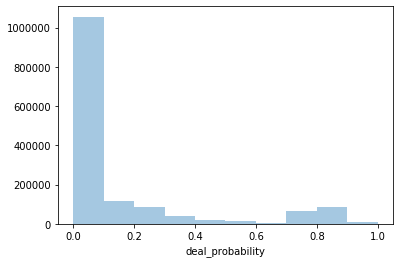

In [8]:
# データをグラフなどで可視化する
# matplotlibのラッパーseabornライブラリを利用する
# 結果はインライン出力する
import seaborn as sns
%matplotlib inline
# 1変数のヒストグラム表示
# deal_probabilityの列のヒストグラム表示
# KDE（カーネル密度推定）は非表示
# データ出現ポイントは非表示
# x軸の刻み目は10
sns.distplot(
        df["deal_probability"],
        kde=False,
        rug=False,
        bins=10
)

In [9]:
df = df.sample(1000)

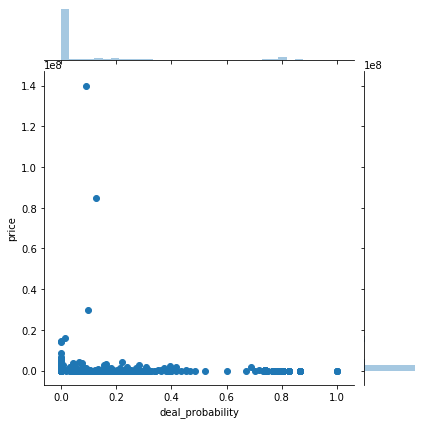

In [10]:
# 2変数の散布図描画
sns.jointplot(
        x='deal_probability',
        y='price',
        data=df
)

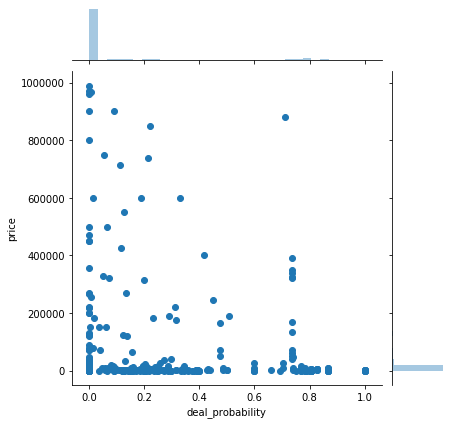

In [9]:
# 明らかな外れ値をpriceのデータから除いてみる
sns.jointplot(
        x='deal_probability',
        y='price',
        data=df[df['price']<1000000]
)

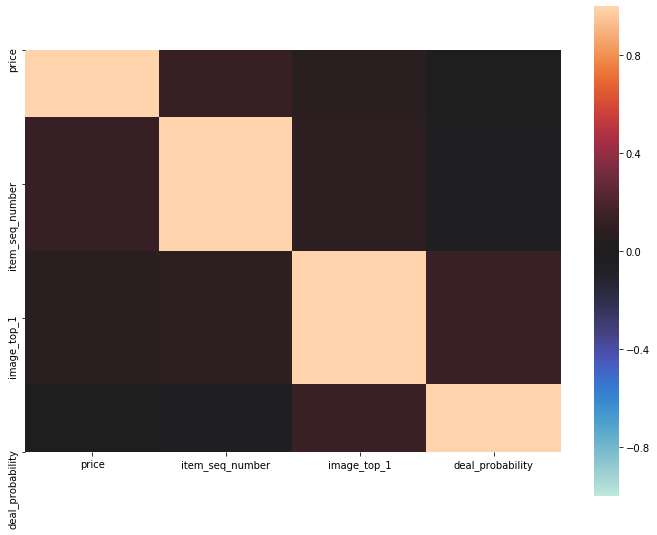

In [14]:
# ヒートマップで相関係数を可視化
import matplotlib.pyplot as plt
# NA / null値を除外して、列のペアワイズ相関を計算
df_corr = df.corr()
fig,ax = plt.subplots(figsize=(12,9))

# 相関係数をヒートマップで表示
sns.heatmap(df_corr,square=True,vmax=1,vmin=-1,
            center=0)


In [15]:
colmn_list =["price","item_seq_number","image_top_1","deal_probability"]
# 各データから欠損値NaNを除外する
df = df[colmn_list].dropna()

In [16]:
# 説明変数、目的変数
X = df.drop("price",axis=1).values
Y = df.loc[:, 'price'].values
# 学習用、検証用データに分割
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X
                                                      , Y
                                                      , test_size = 0.3
                                                      , random_state = 666
                                                     )

In [17]:
len(X_test)

265

In [18]:
len(X_train)

617

In [1]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston
# データのロード、マージ
# scikit-learn に付属しているデータセットの１つboston（ボストン市の住宅価格）をロード
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数、目的変数
X = df.iloc[:, :-1].values
Y = df.loc[:, 'MEDV'].values
# 学習用、検証用データに分割
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X
                                                      , Y
                                                      , test_size = 0.3
                                                      , random_state = 666
                                                     )

In [2]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor(n_estimators=10)
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [3]:
# 予測値を計算
Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)
# MSE(平均二乗誤差)の計算
# 0に近いほど良い（誤差がない）
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, Y_train_pred), mean_squared_error(Y_test, Y_test_pred)) )
# R^2（決定係数）の計算
# 通常、0から1の値を取り、大きいほどモデルが適切（性能が良い、1は完全一致）
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)) )

# 出力
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, Y_train_pred), mean_squared_error(Y_test, Y_test_pred)) )
print('R^2 train : %.3f, test : %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)) )


MSE train : 2.110, test : 14.900
R^2 train : 0.977, test : 0.791
MSE train : 2.110, test : 14.900
R^2 train : 0.977, test : 0.791


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
